In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fx_data_cleaner

import warnings
warnings.filterwarnings('ignore')

imported successfully


In [2]:
# preliminary data cleaning
usd_data = fx_data_cleaner.csv_to_columns('usdcad h1 2008 to 2024.csv')
eur_data = fx_data_cleaner.csv_to_columns('eurcad h1 2008 to 2024.csv')

# load analytical base tables
usdcad_h1 = pd.DataFrame(usd_data)
eurcad_h1 = pd.DataFrame(eur_data)

# Modify datatypes
usdcad_h1 = fx_data_cleaner.fx_data_type(usdcad_h1)
eurcad_h1 = fx_data_cleaner.fx_data_type(eurcad_h1)

In [3]:
print(usdcad_h1.head())
print('___________________________________________________-')
print(eurcad_h1.head())

     open    high     low   close  tick_vol  vol  spread           date_time
0  1.0237  1.0239  1.0213  1.0217       403    0      30 2008-06-11 08:00:00
1  1.0219  1.0227  1.0214  1.0220       391    0      30 2008-06-11 09:00:00
2  1.0221  1.0222  1.0196  1.0196       399    0      30 2008-06-11 10:00:00
3  1.0197  1.0205  1.0173  1.0192       480    0      30 2008-06-11 11:00:00
4  1.0193  1.0195  1.0184  1.0189       239    0      30 2008-06-11 12:00:00
___________________________________________________-
     open    high     low   close  tick_vol  vol  spread           date_time
0  1.6061  1.6078  1.6060  1.6064       166    0      80 2008-04-18 00:00:00
1  1.6065  1.6076  1.6061  1.6072       303    0      80 2008-04-18 01:00:00
2  1.6071  1.6072  1.6012  1.6021       587    0      80 2008-04-18 02:00:00
3  1.6019  1.6038  1.6010  1.6033       358    0      80 2008-04-18 03:00:00
4  1.6032  1.6034  1.6017  1.6019       266    0      80 2008-04-18 04:00:00


In [4]:
print(usdcad_h1['vol'].value_counts()[:10])
print('_______________________________________')
print(eurcad_h1['vol'].value_counts()[:10])

vol
0             87888
2000000           3
1479500000        3
3105200000        2
13000000          2
3121150000        2
4170150000        2
1575000000        2
2359150000        2
1588500000        2
Name: count, dtype: int64
_______________________________________
vol
0             88802
1186250000        3
927650000         3
1869500000        3
1263950000        2
1851500000        2
696100000         2
1974000000        2
2443400000        2
5892650000        2
Name: count, dtype: int64


In [5]:
print(usdcad_h1['tick_vol'].value_counts()[:10])
print(usdcad_h1['tick_vol'].value_counts()[-10:])

tick_vol
758     52
1124    52
909     51
661     50
726     48
961     48
660     48
1121    47
840     47
707     46
Name: count, dtype: int64
tick_vol
14737    1
9121     1
6998     1
10591    1
9232     1
8515     1
6225     1
10218    1
9360     1
7133     1
Name: count, dtype: int64


In [6]:
print(eurcad_h1['tick_vol'].value_counts()[:10])
print(eurcad_h1['tick_vol'].value_counts()[-10:])

tick_vol
1750    41
1       40
2296    39
1284    39
1766    38
1960    37
1408    36
1406    35
1411    34
1895    34
Name: count, dtype: int64
tick_vol
15924    1
17089    1
13443    1
14317    1
12075    1
14769    1
10999    1
14249    1
17938    1
10157    1
Name: count, dtype: int64


In [7]:
print(usdcad_h1.info())
print('______________________________________')
print(eurcad_h1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   open       100000 non-null  float64       
 1   high       100000 non-null  float64       
 2   low        100000 non-null  float64       
 3   close      100000 non-null  float64       
 4   tick_vol   100000 non-null  int32         
 5   vol        100000 non-null  int64         
 6   spread     100000 non-null  int32         
 7   date_time  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1)
memory usage: 6.1 MB
None
______________________________________
<class 'pandas.core.frame.DataFrame'>
Index: 100900 entries, 0 to 100899
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   open       100900 non-null  float64       
 1   high       100900 non-null  float64    

In [8]:
print(usdcad_h1.describe().T)
print('______________________________________________')
print(eurcad_h1.describe().T)

              count                           mean                  min  \
open       100000.0                       1.206908               0.9414   
high       100000.0                        1.20781              0.94207   
low        100000.0                       1.206015              0.94062   
close      100000.0                       1.206915              0.94141   
tick_vol   100000.0                     2725.73743                  1.0   
vol        100000.0                593465498.36546                  0.0   
spread     100000.0                        9.98687                  0.0   
date_time    100000  2016-07-09 10:36:52.848000256  2008-06-11 08:00:00   

                           25%                  50%                  75%  \
open                  1.053127              1.26213              1.32397   
high                   1.05428              1.26308              1.32475   
low                    1.05222              1.26112              1.32323   
close               

In [9]:
def data_distribution_plot(df, currency):
    for column in df.columns:
        fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (7, 4))
        sns.boxplot(df[column], orient='h', color = 'purple', ax= ax1)
        ax1.set_xlabel(f'{currency} {column}')
        ax1.set_title(f'Boxplot of {currency} {column}')

        sns.histplot(df[column], bins = 50, color = 'purple', kde = True, ax = ax2)
        ax2.set_xlabel(f'{currency} {column}')
        ax2.set_ylabel('Frequency')
        ax2.set_title(f'Frequency distribution of {currency} {column}')

        plt.tight_layout()

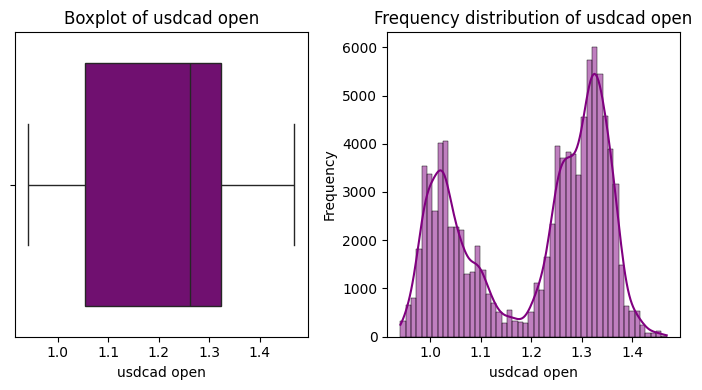

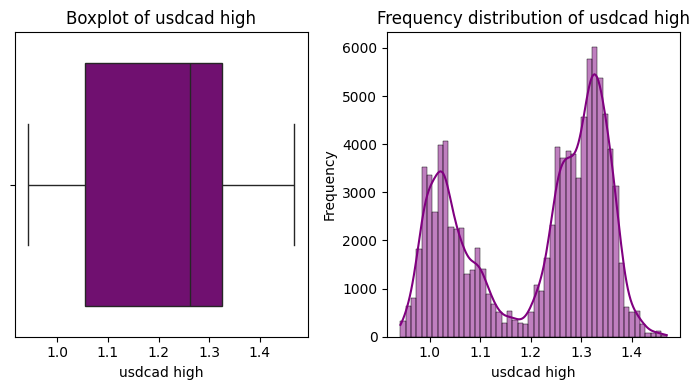

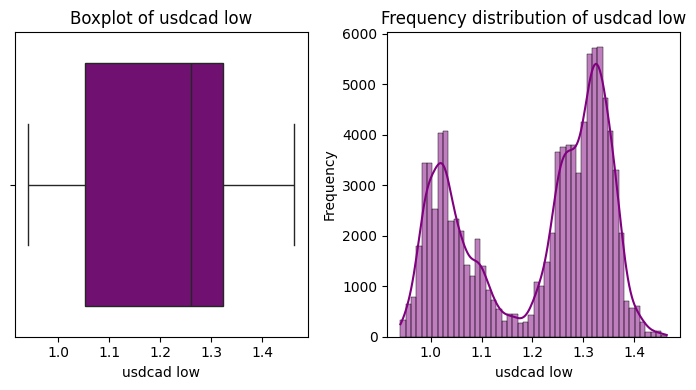

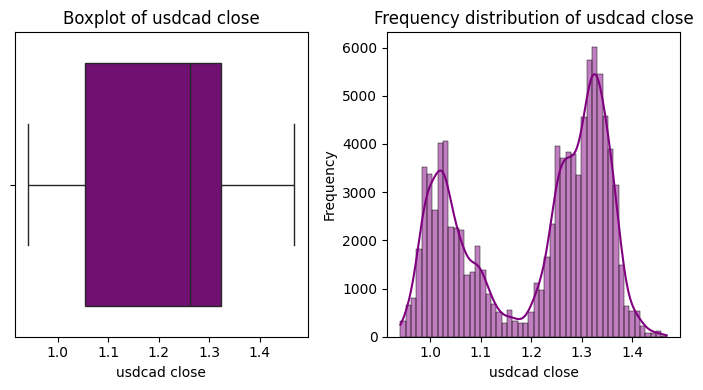

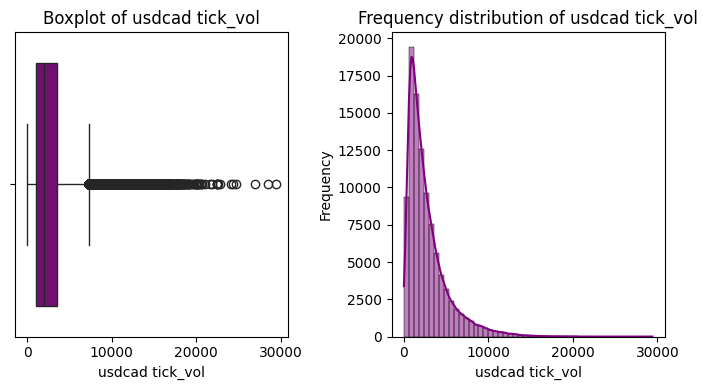

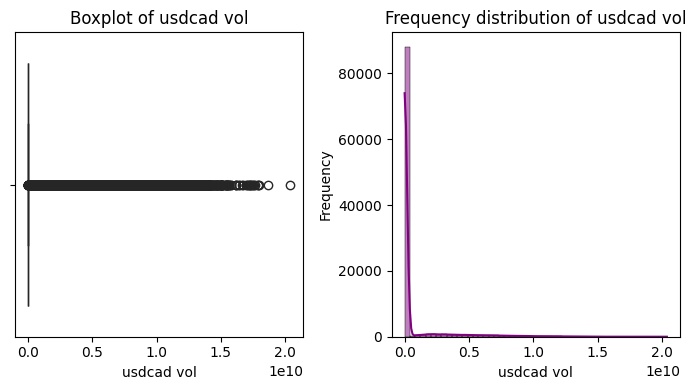

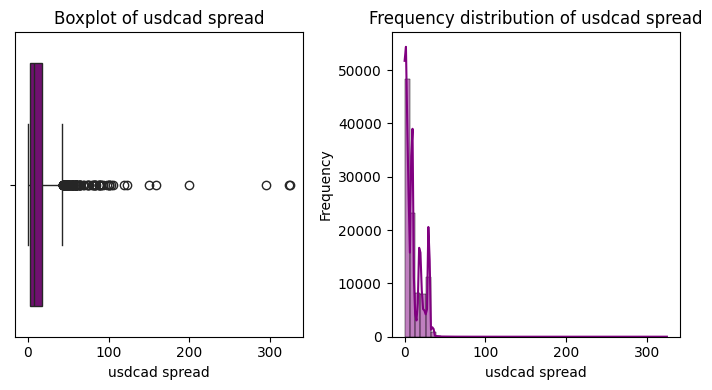

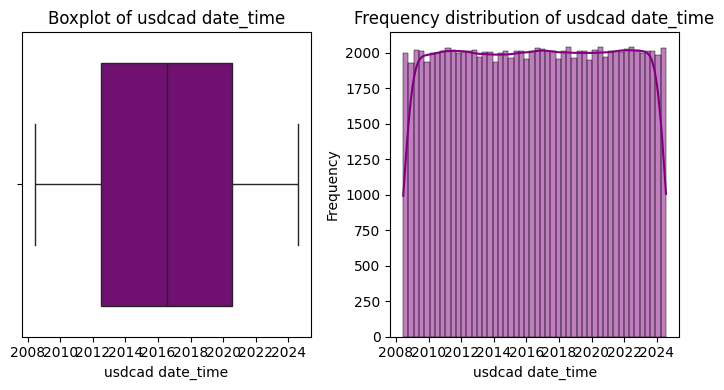

In [10]:
data_distribution_plot(usdcad_h1, 'usdcad')

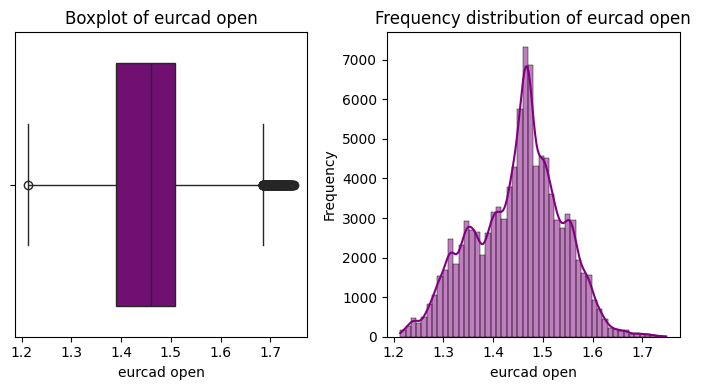

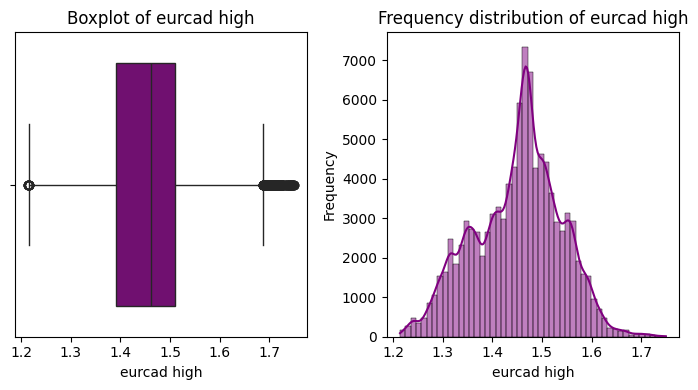

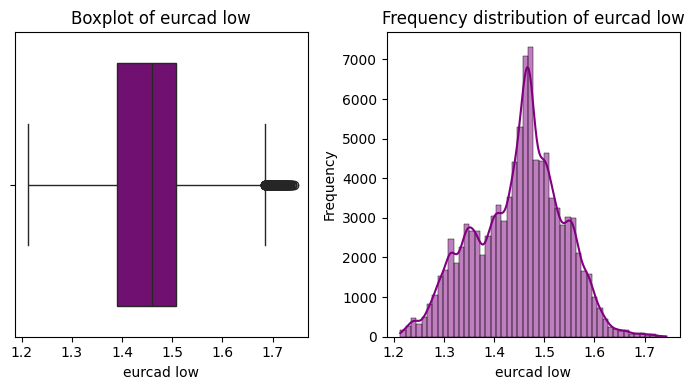

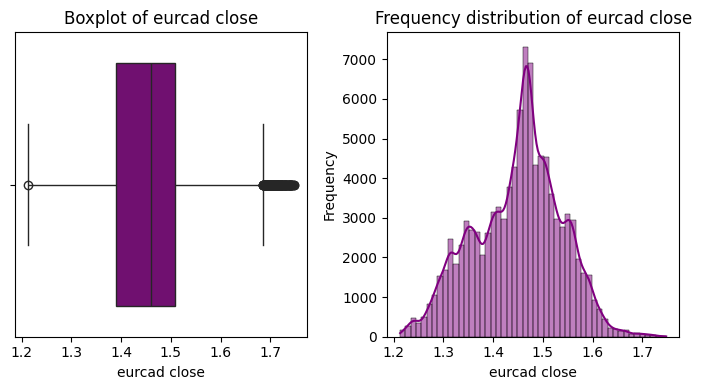

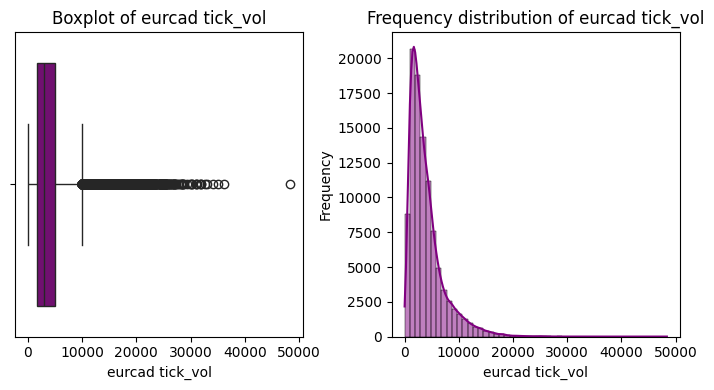

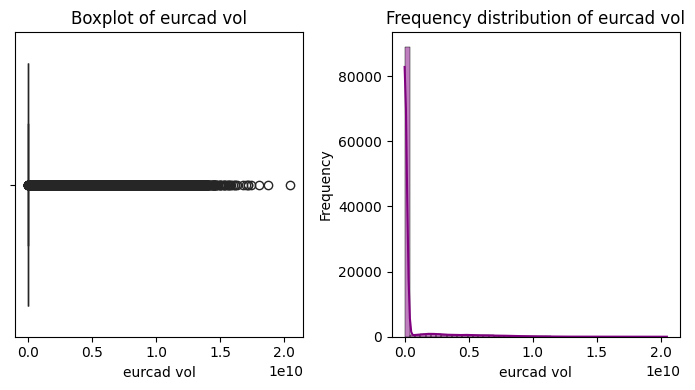

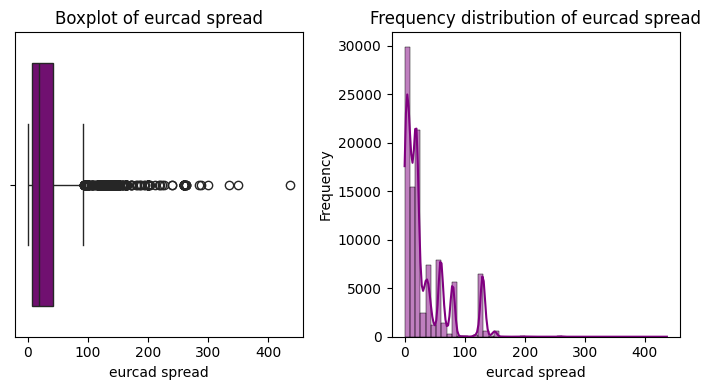

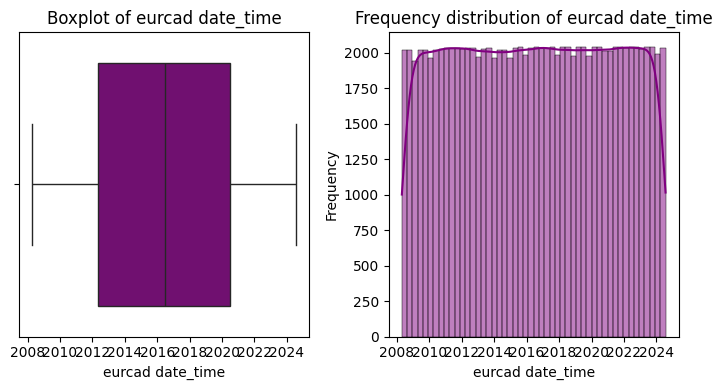

In [11]:
data_distribution_plot(eurcad_h1, 'eurcad')

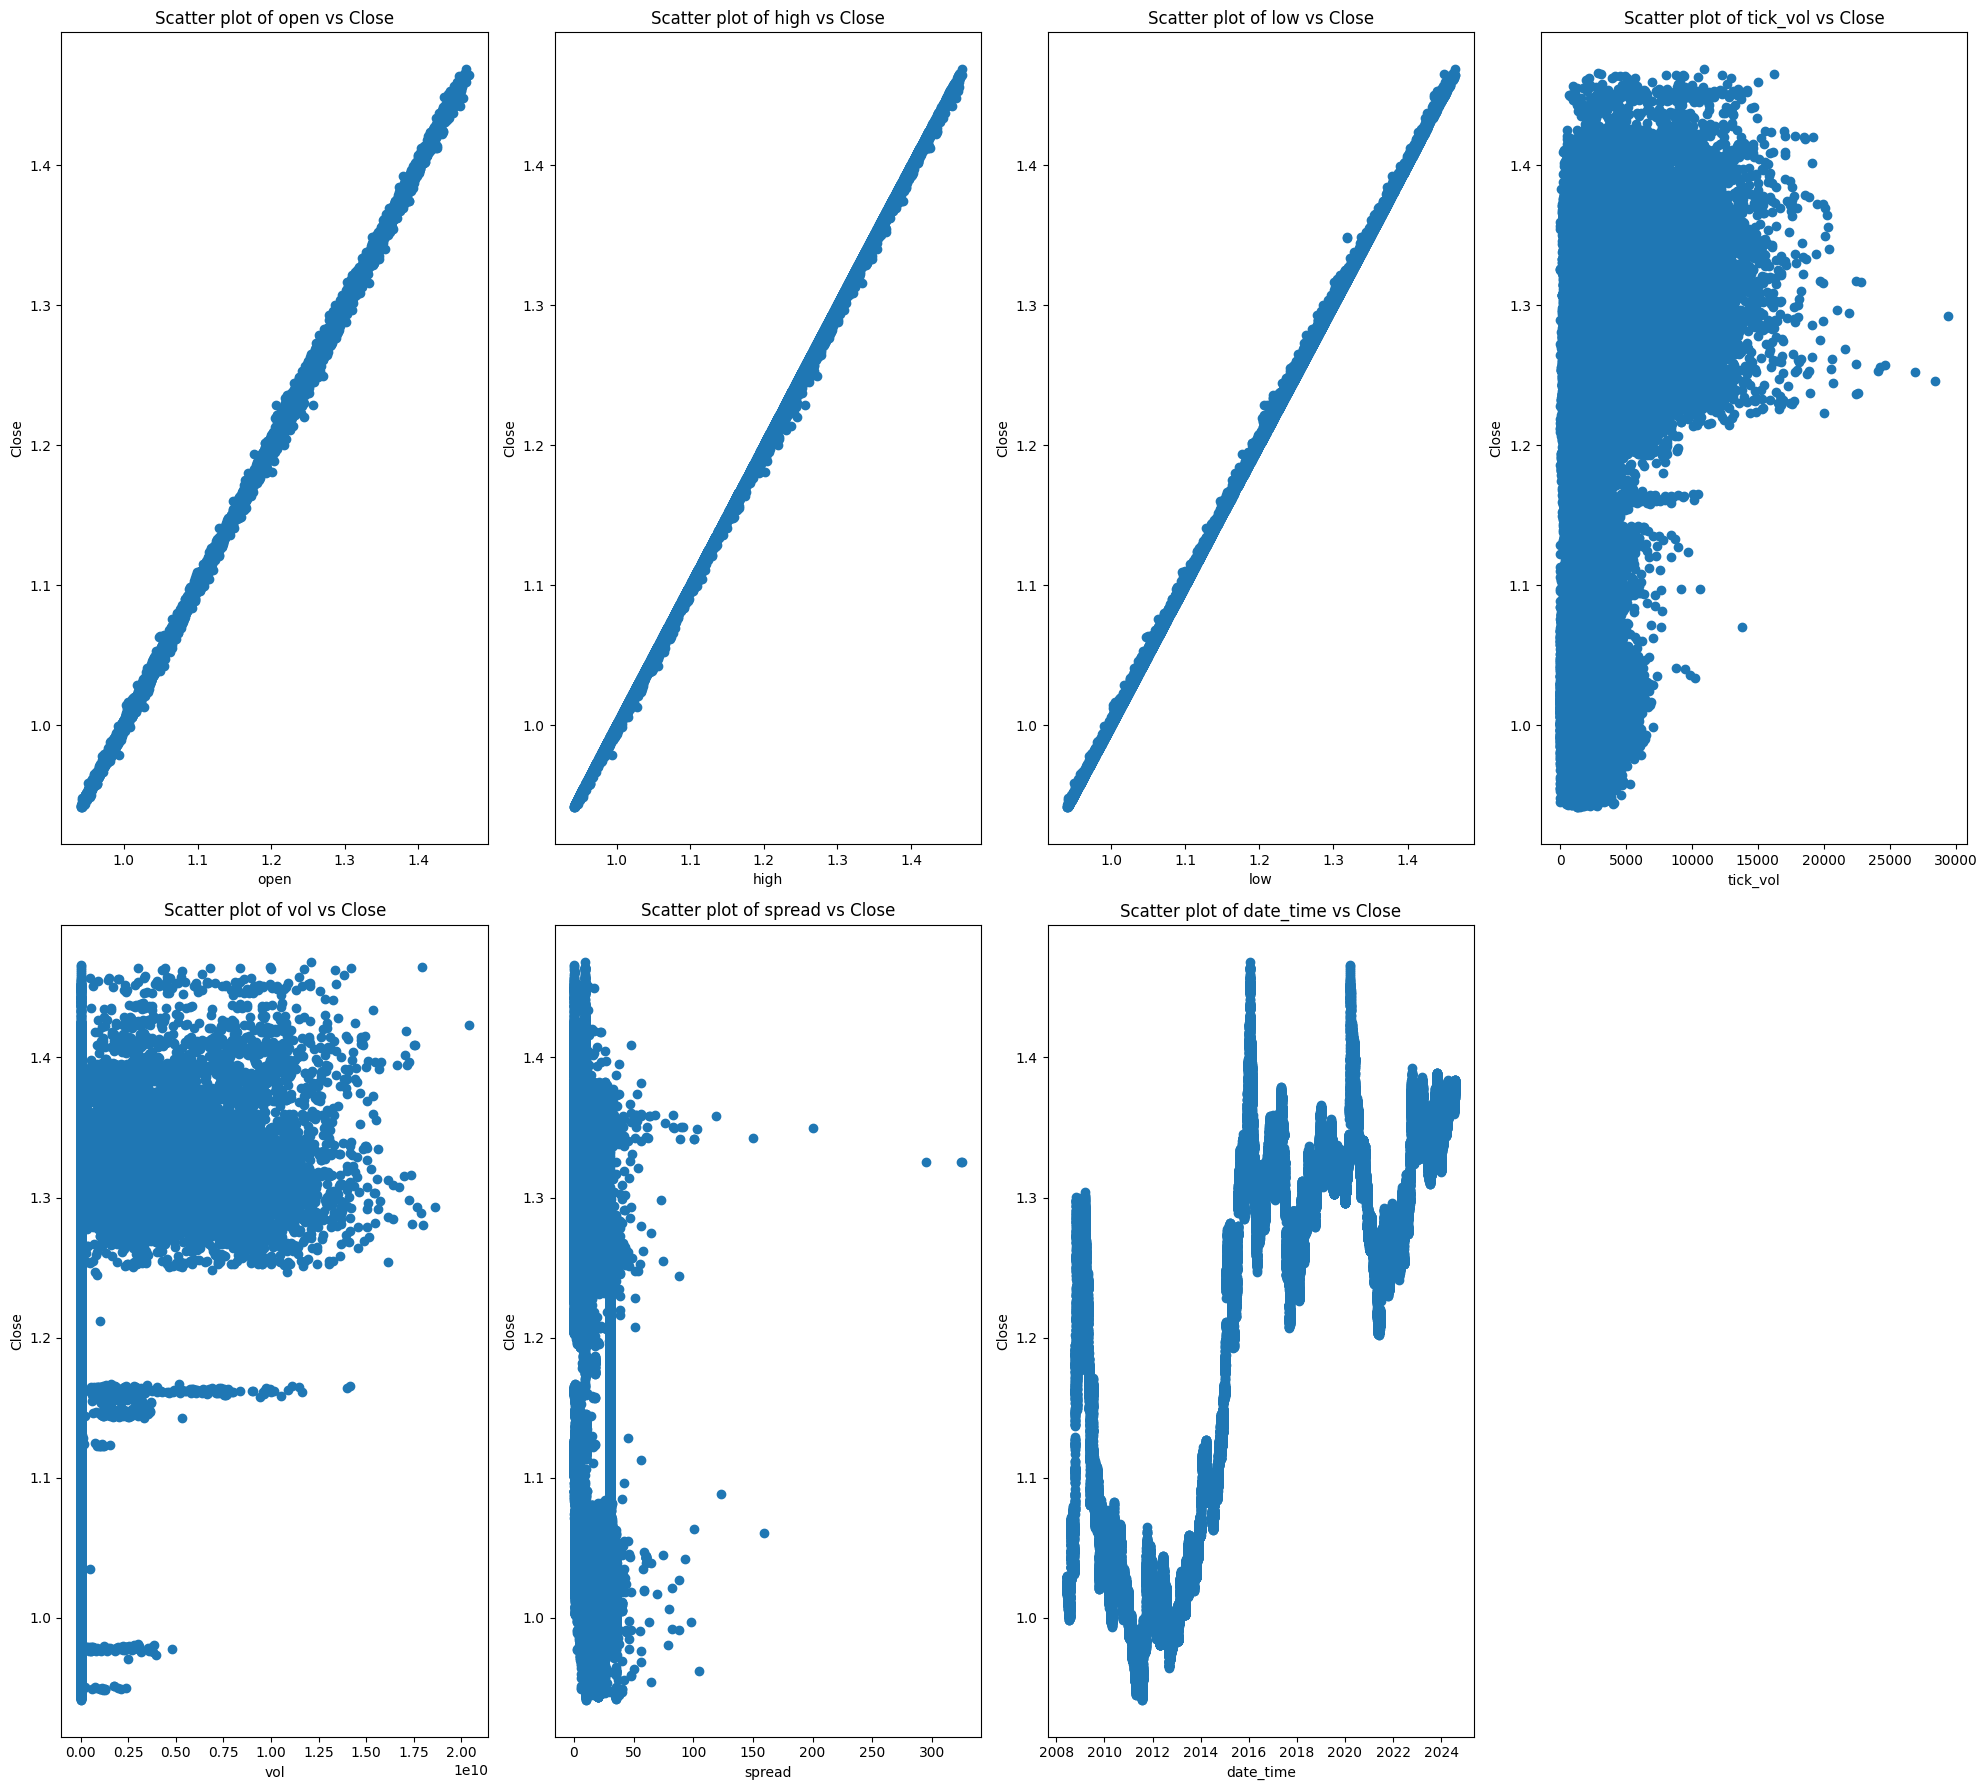

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 18))
ax = ax.flatten()
for i, column in enumerate(usdcad_h1.drop(columns = ['close']).columns):
    ax[i].scatter(usdcad_h1[column], usdcad_h1['close'])
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('Close')
    ax[i].set_title(f'Scatter plot of {column} vs Close')

for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])
    
    plt.tight_layout();

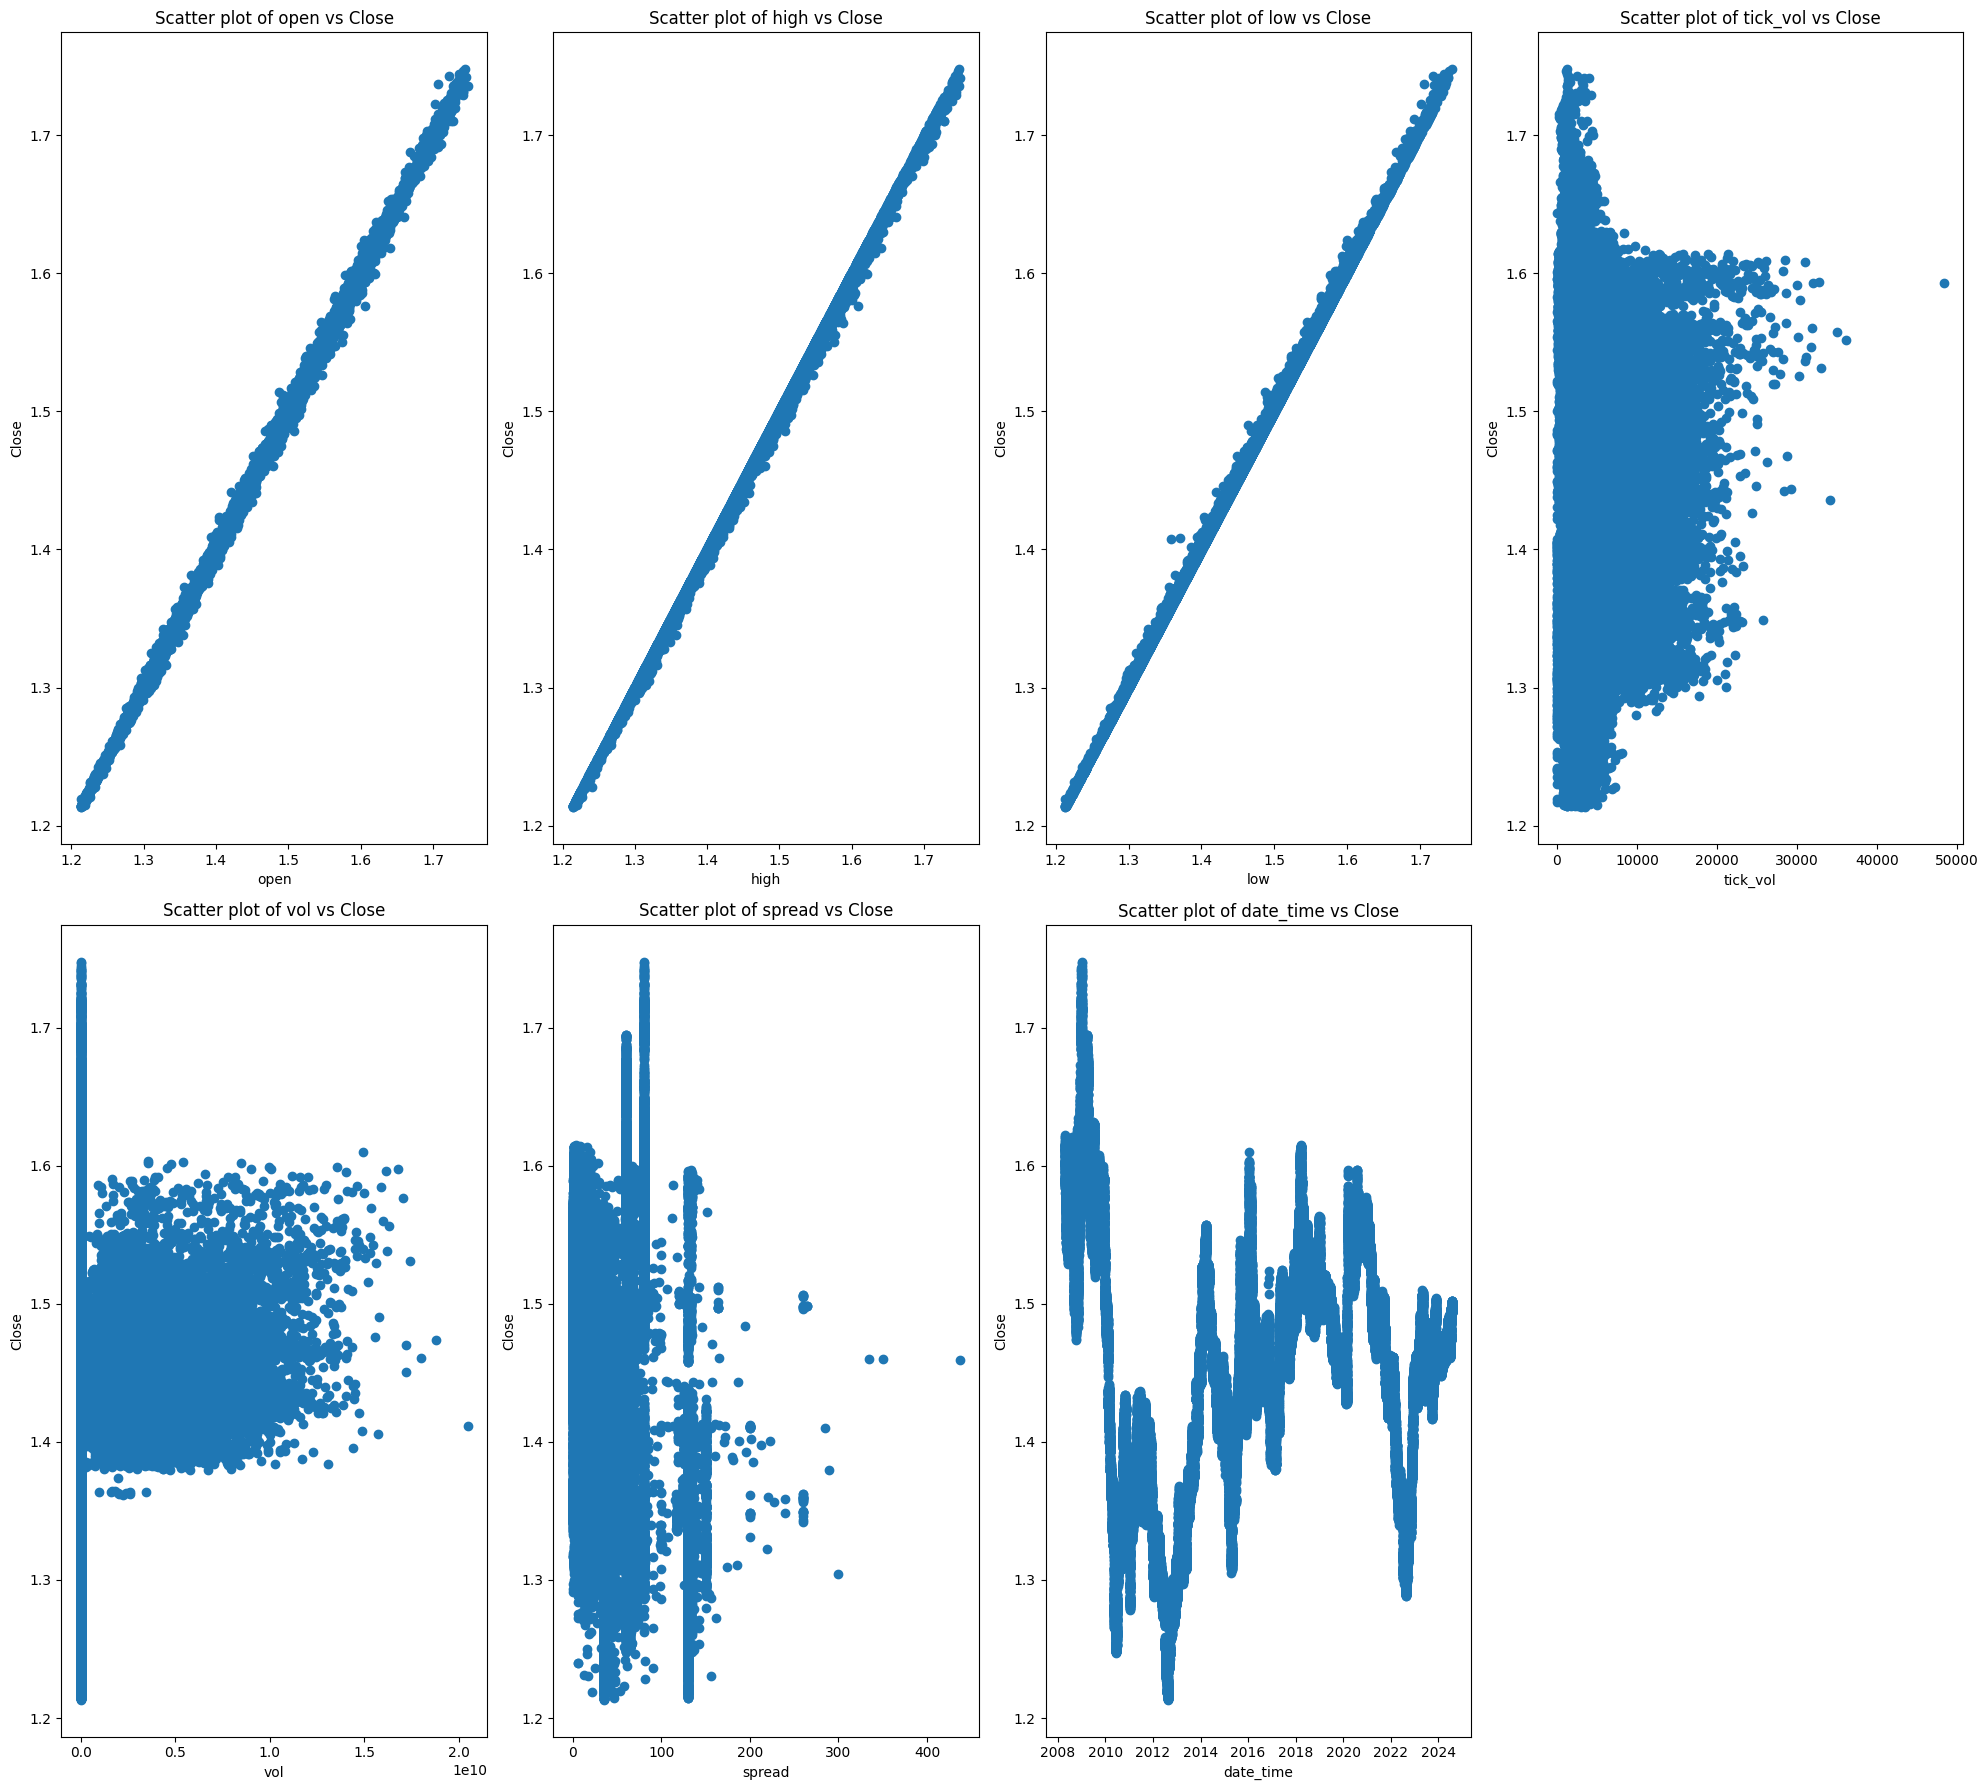

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 18))
ax = ax.flatten()
for i, column in enumerate(eurcad_h1.drop(columns=['close']).columns):
    ax[i].scatter(eurcad_h1[column], eurcad_h1['close'])
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('Close')
    ax[i].set_title(f'Scatter plot of {column} vs Close')

for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])

    plt.tight_layout()

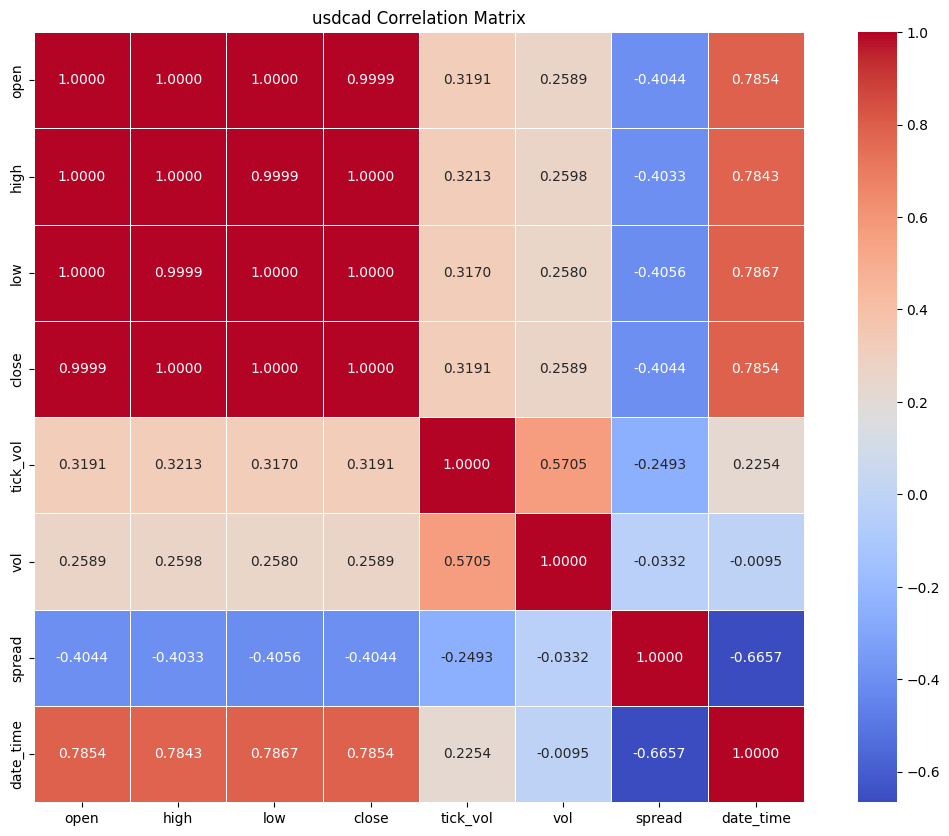

In [14]:
corr_matrix = usdcad_h1.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.4f',
            linewidths=0.5, square=True)
plt.title('usdcad Correlation Matrix');

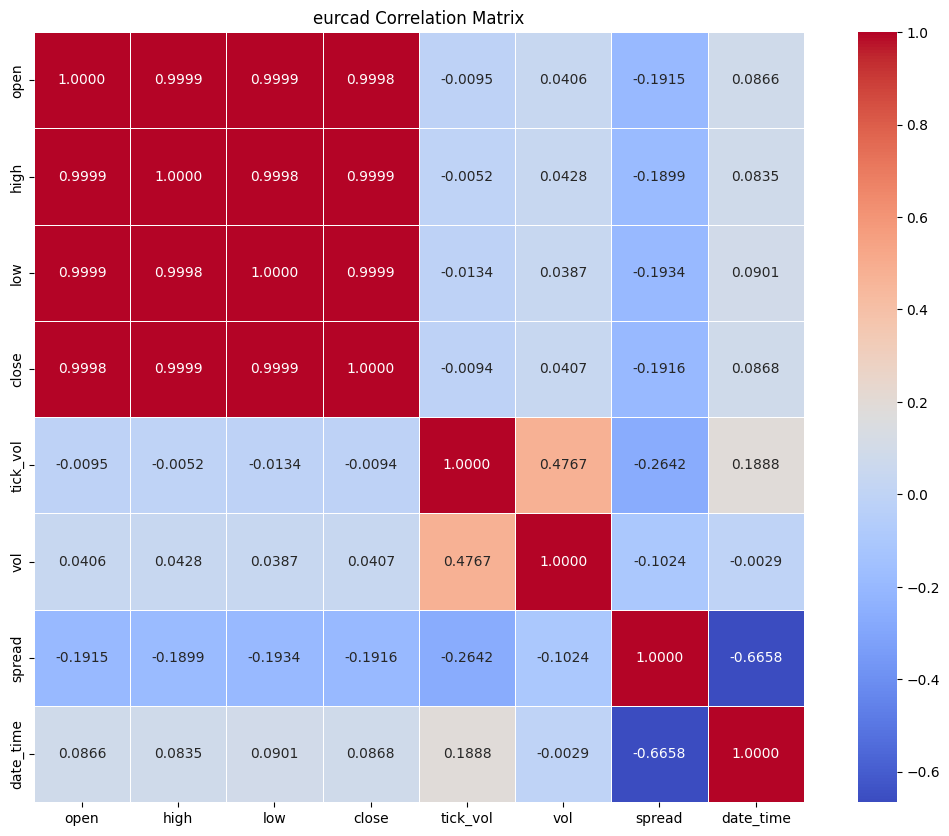

In [15]:
corr_matrix = eurcad_h1.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.4f',
            linewidths=0.5, square=True)
plt.title('eurcad Correlation Matrix');

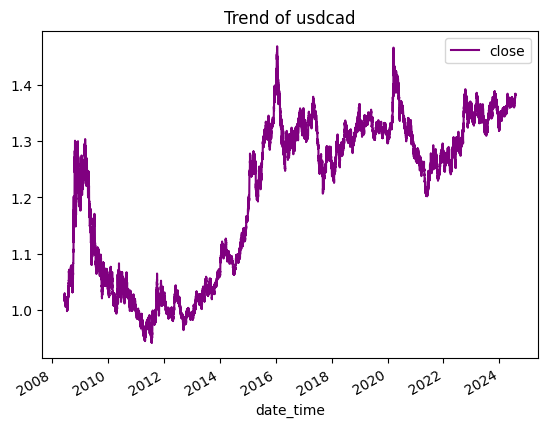

In [16]:
usdcad_h1.plot.line(x = 'date_time', y = 'close', color = 'purple')
plt.title('Trend of usdcad');

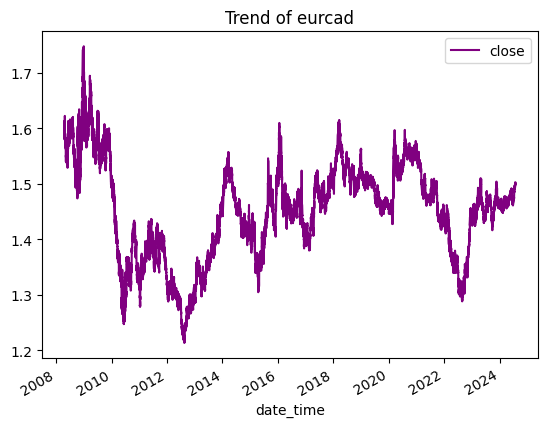

In [17]:
eurcad_h1.plot.line(x='date_time', y='close', color = 'purple')
plt.title('Trend of eurcad');

In [18]:
usdcad_h1[['hist_close']] = usdcad_h1[['close']].shift()
usdcad_h1 = usdcad_h1.fillna(0)
usdcad_h1

,open,high,low,close,tick_vol,vol,spread,date_time,hist_close
0,1.02370,1.02390,1.02130,1.02170,403,0,30,2008-06-11 08:00:00,0.00000
1,1.02190,1.02270,1.02140,1.02200,391,0,30,2008-06-11 09:00:00,1.02170
2,1.02210,1.02220,1.01960,1.01960,399,0,30,2008-06-11 10:00:00,1.02200
3,1.01970,1.02050,1.01730,1.01920,480,0,30,2008-06-11 11:00:00,1.01960
4,1.01930,1.01950,1.01840,1.01890,239,0,30,2008-06-11 12:00:00,1.01920
...,...,...,...,...,...,...,...,...,...
99995,1.38337,1.38366,1.38214,1.38220,1842,0,2,2024-07-26 19:00:00,1.38337
99996,1.38219,1.38365,1.38196,1.38332,2192,0,2,2024-07-26 20:00:00,1.38220
99997,1.38332,1.38395,1.38292,1.38376,1914,0,4,2024-07-26 21:00:00,1.38332
99998,1.38376,1.38398,1.38306,1.38308,1436,0,4,2024-07-26 22:00:00,1.38376


In [20]:
usdcad_h1.to_csv('usdcad_h1_financial_data.csv')